Exploratory Data Analysis on Haberman Data

Objective : To perform Exploratory Data Analysis on Haberman Dataset of cancer patient to predict the survival status 
            of a patient.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 

warnings.filterwarnings("ignore") 

# Load haberman.csv data
haberman = pd.read_csv("C:\Anu\MachineLearning Manali\AAIC\Assignment\mandatory_2\haberman.csv")

# To load the starting 10 rows :
haberman.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [2]:
# To load the ending 10 rows :
haberman.tail(10)

,age,year,nodes,status
296,72,67,3,1
297,73,62,0,1
298,73,68,0,1
299,74,65,3,2
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [3]:
#Que.1 : how many data-points and features are in haberman?
print(haberman.shape)

(306, 4)


In [4]:
#Que.2 : What are the column names in the dataset?
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
#Que.3 : How many data points for each class are present? 
haberman["status"].value_counts()               # data points for status 

1    225
2     81
Name: status, dtype: int64

Observations :
    1. Status value count showing an balanced dataset because there are only two status :
        1 is used for patient who survived
        2 is used for patient those could not survived.
    2. From 306 patient 225 patient were able to survive and 81 patient were not able to survive.

In [6]:
# i have calculated value count of each object to observe most frequently occuring element
haberman["age"].value_counts()                 # data points for age

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

Observation : 
    1. First glance is looks like Imbalanced Dataset
    2. At the age of 52, There were 14 patient but as the age increases the petients number decreses.    

In [7]:
haberman["year"].value_counts()                # data points for year

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

Observation :
    1. From the year value count , we can say that , there are maximum patient survived in the year of 58 i.e. 36.
    2. There were very few patient i.e. 11 only who survived in the year of 69.

In [8]:
haberman["nodes"].value_counts()               # data points for nodes

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: nodes, dtype: int64

Observation :
    1. As the node count increases the petients number decreses.

In [9]:
# To find the database summary 
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


2-D Scatter PLot

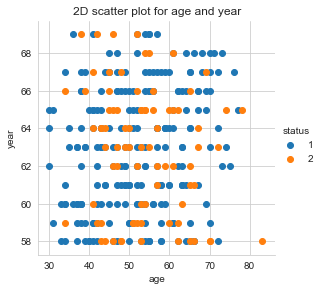

In [17]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height = 4).map(plt.scatter, "age", "year").add_legend()
plt.title("2D scatter plot for age and year")
plt.show();

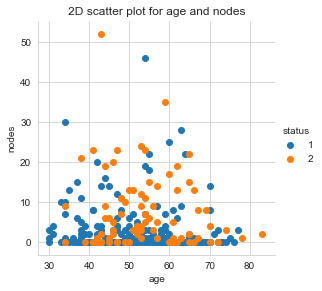

In [18]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "age", "nodes").add_legend();
plt.title("2D scatter plot for age and nodes")
plt.show();

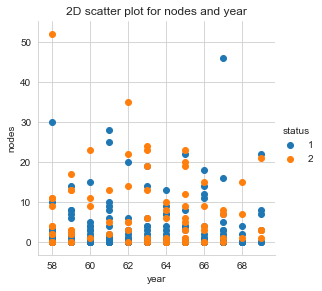

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "year", "nodes").add_legend()
plt.title("2D scatter plot for nodes and year")
plt.show();

Observation :
    1. I tried 3 different features : 1. age and year , 2. age and nodes and 3. year and nodes but all 2D scatter plot there 
        are considerable overlapping of status of survival and and non-survival.

Pair Plots

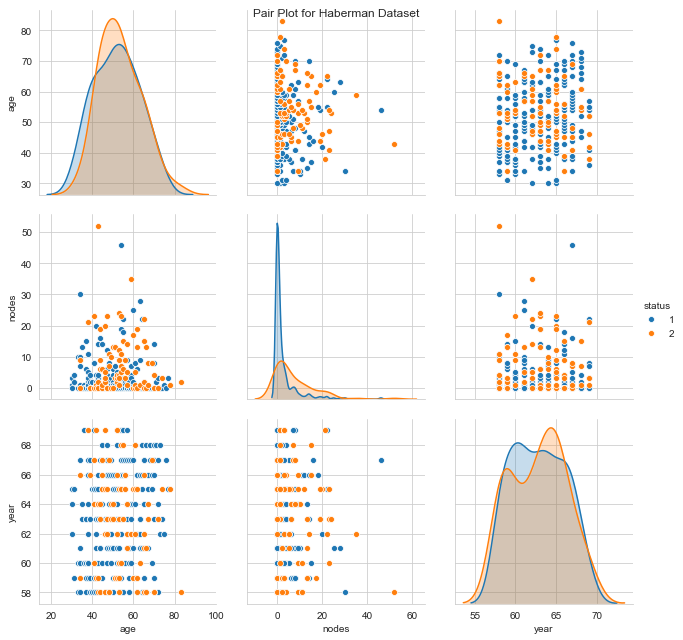

In [33]:
plt.close();
sns.set_style("whitegrid")
ab = sns.pairplot(haberman, hue="status", height =3, vars = ["age","nodes","year"])
ab.fig.suptitle("Pair Plot for Haberman Dataset")
plt.show()

Observation :
    1. In the above pair plots , plot 2 i.e age vs year has very overlapping points of status which are 1 for survival more 
       than 5 years and 2 for survival less than 5 year. The plot 5 is exact same of plot 2 i.e year vs age has the same 
       overlapping. Heance i can not consider these 2 graph for further data exploration.
    2. In plot 3, age vs nodes , there is also overlapping but some points are distinguishable. This plot feels better than 
       the above plot for further operations. Plot 9 is the same as plot 3.
    3. In plot 7, year vs nodes is similiar to plot 10 but there is overlapping of points.   

1D scatter plot

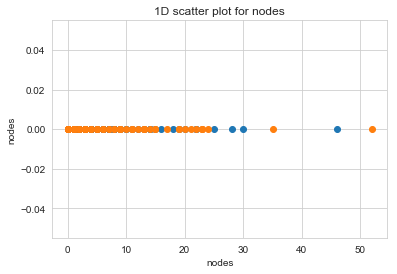

In [35]:
# 1D scatter plot for nodes

import numpy as np
survival_more_5 = haberman.loc[haberman["status"] == 1]
survival_less_5 = haberman.loc[haberman["status"] == 2]
plt.plot(survival_more_5["nodes"], np.zeros_like(survival_more_5['nodes']), 'o')
plt.plot(survival_less_5["nodes"], np.zeros_like(survival_less_5['nodes']), 'o')
plt.xlabel("nodes")
plt.ylabel("nodes")
plt.title("1D scatter plot for nodes")
plt.show()

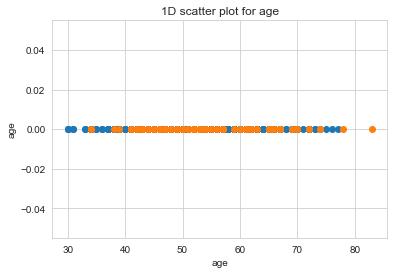

In [36]:
# 1D scatter plot for age

import numpy as np
survival_more_5 = haberman.loc[haberman["status"] == 1]
survival_less_5 = haberman.loc[haberman["status"] == 2]
plt.plot(survival_more_5["age"], np.zeros_like(survival_more_5['age']), 'o')
plt.plot(survival_less_5["age"], np.zeros_like(survival_less_5['age']), 'o')
plt.xlabel("age")
plt.ylabel("age")
plt.title("1D scatter plot for age")
plt.show()

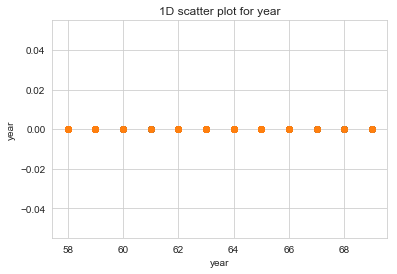

In [37]:
# 1D scatter plot for year

import numpy as np
survival_more_5 = haberman.loc[haberman["status"] == 1]
survival_less_5 = haberman.loc[haberman["status"] == 2]
plt.plot(survival_more_5["year"], np.zeros_like(survival_more_5['year']), 'o')
plt.plot(survival_less_5["year"], np.zeros_like(survival_less_5['year']), 'o')
plt.xlabel("year")
plt.ylabel("year")
plt.title("1D scatter plot for year")
plt.show()

Obervation :
    I plotted 1D scatter plot for 3 different columns in haberamn database i.e age , nodes n year. I observed survival more 
    than 5 year status points and survival less than 5 years points are totally overapped. Hence these plots can not use for 
    further decision and processing.

Histograms

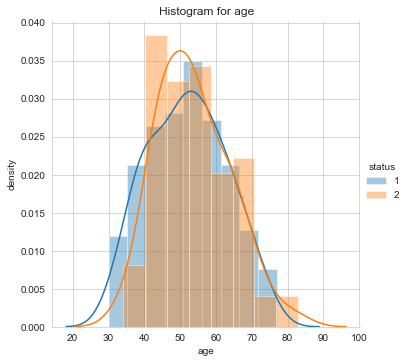

In [39]:
# Histogram for age
sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "age").add_legend();
plt.xlabel("age")
plt.ylabel("density")
plt.title("Histogram for age")
plt.show()

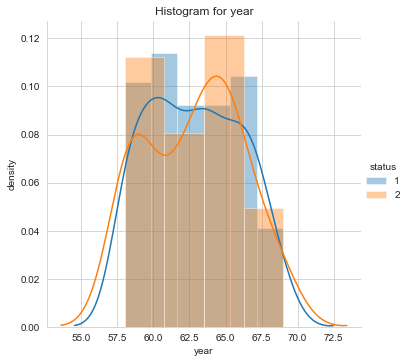

In [40]:
# HIstogram for year 
sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "year").add_legend()
plt.xlabel("year")
plt.ylabel("density")
plt.title("Histogram for year")
plt.show()

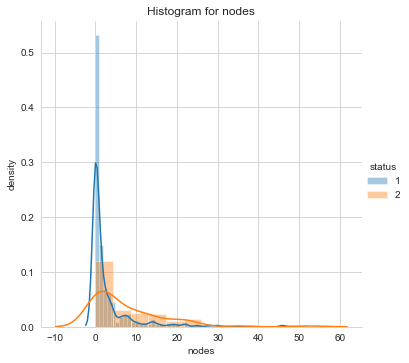

In [41]:
#histogram for nodes
sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "nodes").add_legend()
plt.xlabel("nodes")
plt.ylabel("density")
plt.title("Histogram for nodes")
plt.show()

Observation :
    In the above two histograms , there is overlapping but in histogram of nodes, i observed that the patient survived for long 
    period of time if they have less nodes and vice-versa.

Probability Density Function (PDF) and Cumulative Distribution Function (CDF)

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


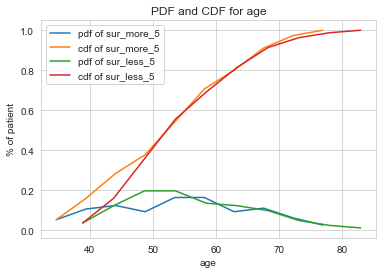

In [46]:
# Plots of CDF of age for status.

label = ["pdf of sur_more_5", "cdf of sur_more_5", "pdf of sur_less_5", "cdf of sur_less_5"]
#survival for more than 5 years
counts, bin_edges = np.histogram(survival_more_5['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# survival for less than 5 year
counts, bin_edges = np.histogram(survival_less_5['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.xlabel("age")
plt.ylabel("% of patient")
plt.title("PDF and CDF for age")
plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


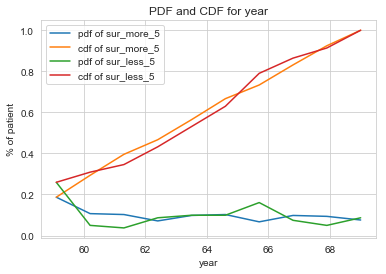

In [47]:
# Plots of CDF of year for status.
label = ["pdf of sur_more_5", "cdf of sur_more_5", "pdf of sur_less_5", "cdf of sur_less_5"]
#survival for more than 5 years
counts, bin_edges = np.histogram(survival_more_5['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# survival for less than 5 year
counts, bin_edges = np.histogram(survival_less_5['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.xlabel("year")
plt.ylabel("% of patient")
plt.title("PDF and CDF for year")
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


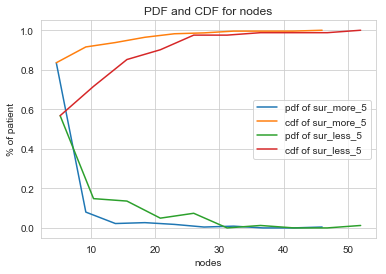

In [48]:
# Plots of CDF of age for status.
label = ["pdf of sur_more_5", "cdf of sur_more_5", "pdf of sur_less_5", "cdf of sur_less_5"]
#survival for more than 5 years
counts, bin_edges = np.histogram(survival_more_5['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# survival for less than 5 year
counts, bin_edges = np.histogram(survival_less_5['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)
plt.xlabel("nodes")
plt.ylabel("% of patient")
plt.title("PDF and CDF for nodes")
plt.show();

 Mean, Variance and Std-dev 

In [49]:
#Mean, Variance, 
print("Means for haberman database for age  :")
print(np.mean(survival_more_5["age"]))
print(np.mean(survival_less_5["age"]))

print("Means for haberman database for year  :")
print(np.mean(survival_more_5["year"]))
print(np.mean(survival_less_5["year"]))

print("Means for haberman database for nodes  :")
print(np.mean(survival_more_5["nodes"]))
print(np.mean(survival_less_5["nodes"]))



Means for haberman database for age  :
52.01777777777778
53.67901234567901
Means for haberman database for year  :
62.86222222222222
62.82716049382716
Means for haberman database for nodes  :
2.7911111111111113
7.45679012345679


In [50]:
# Std-deviation
print("\nStd-deviation for haberman database for age :");
print(np.std(survival_more_5["age"]))
print(np.std(survival_less_5["age"]))

print("\nStd-deviation for haberman database for year :");
print(np.std(survival_more_5["year"]))
print(np.std(survival_less_5["year"]))

print("\nStd-deviation for haberman database for nodes :");
print(np.std(survival_more_5["nodes"]))
print(np.std(survival_less_5["nodes"]))


Std-deviation for haberman database for age :
10.98765547510051
10.10418219303131

Std-deviation for haberman database for year :
3.2157452144021956
3.3214236255207883

Std-deviation for haberman database for nodes :
5.857258449412131
9.128776076761632


Median, Percentile, Quantile, IQR, MAD for "nodes"

In [51]:
print("\n Medians:")
print(np.median(survival_more_5["nodes"]))
print(np.median(survival_less_5["nodes"]))


print("\n Quantiles:")
print(np.percentile(survival_more_5["nodes"],np.arange(0, 100, 25)))
print(np.percentile(survival_less_5["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(survival_more_5["nodes"],90))
print(np.percentile(survival_less_5["nodes"],90))


from statsmodels import robust
print ("\n Median Absolute Deviation")
print(robust.mad(survival_more_5["nodes"]))
print(robust.mad(survival_less_5["nodes"]))



 Medians:
0.0
4.0

 Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

 Median Absolute Deviation
0.0
5.930408874022408


Box plot and Whiskers for "nodes"

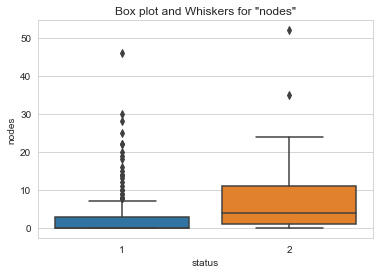

In [58]:
sns.boxplot(x='status',y='nodes', data=haberman).set_title('Box plot and Whiskers for "nodes"')
plt.show()

Violin plots

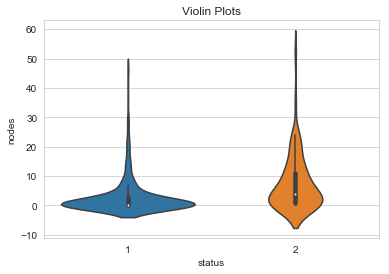

In [59]:
sns.violinplot(x="status", y="nodes", data=haberman, height=8).set_title("Violin Plots")
plt.show()

Observation :
    In above violin plot , I observed that for long survival the nodes shuld be near or more than 0 nodes.    

Multivariate probability density, contour plot.

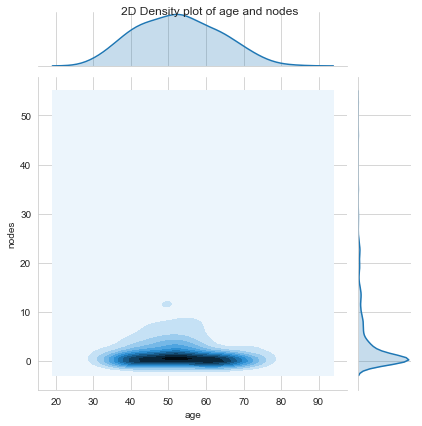

In [63]:
#2D Density plot, contors-plot
ab = sns.jointplot(x="age", y="nodes", data=haberman, kind="kde")
ab.fig.suptitle("2D Density plot of age and nodes")
plt.show()

Observation :
    In above plot, nodes and age , I observed that surivival more than 5 years is in range 30-80 of age and nodes from 0 to 4.
    The dark area shows the major density and density is getting less as the plot becomes lighter.

Conclusion :
    1. As i performed the value count opeartion of the given haberman datasets ,the data is imbalanced except for 
       status column. 
    2. There are too much overlapping between the data points as i have seen in pair plots. Hence it is little difficult 
       to predict.
    3. nodes and age are the columns which are useful for further process.